<a href="https://colab.research.google.com/github/Ira-a02/Algorithm/blob/main/ants_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib as plt

In [14]:
ant =1
iter = 200
alpha = 1.0
beta = 1.0
rho = 0.5
n = 20

In [15]:
def generate_coordinates(n):
   return np.random.uniform(-100, 100, (n, 2))

In [16]:
def generate_distances(coord, n):
  distance = np.zeros((n,n))
  for i in range (n):
    for j in range (i+1, n):
      distance[i][j] = np.sqrt(np.sum((coord[i] - coord[j]) ** 2))
      distance[j][i] = distance[i][j]
  return distance

In [17]:
def initialize_pheromones(n):
    return np.ones((n, n))

In [18]:
def update_pheromones(pheromones, all_paths, distances):
    pheromones = (1 - rho)*pheromones
    for path in all_paths:
        for i in range(len(path) - 1):
            pheromones[path[i]][path[i + 1]] += 1 / distances[path[i]][path[i + 1]]
            pheromones[path[i + 1]][path[i]] += 1 / distances[path[i + 1]][path[i]]
    return pheromones

In [99]:
def choose_next_point(current_point, pheromones, distances, visited):
    pheromone = pheromones[current_point] ** alpha
    expirience = np.zeros_like(distances[current_point])

    for i in range(len(distances[current_point])):
        if distances[current_point][i] > 0:
            expirience[i] = 1 / distances[current_point][i] ** beta
        else:
            expirience[i] = 0

    probabilities = pheromone * expirience
    probabilities[visited] = 0
    if probabilities.sum() > 0:
      probabilities /= probabilities.sum()
    else:
      probabilities =1
    return np.random.choice(range(len(probabilities)), p=probabilities)


In [101]:
def ants_algorithm (ant, iter, alpha, beta, rho, n, coord):
    distances = generate_distances(coord, n)
    pheromones = initialize_pheromones(n)

    best_path = None
    best_length = float('inf')

    for i in range(iter):
        all_paths = []
        for i in range(ant):
            visited_points = [False] * n
            current_point = np.random.randint(0, n)
            path = [current_point]
            visited_points[current_point] = True

            for i in range(n - 1):
                next_city = choose_next_point(current_point, pheromones, distances, visited_points)
                path.append(next_city)
                current_point = next_city
                visited_points[next_city] = True

            all_paths.append(path)

            path_length = sum(distances[path[i]][path[i + 1]] for i in range(n - 1))#-1 0
            #path_length += distances[path[-1]][path[0]]  # Замыкание пути

            if path_length < best_length:
                best_length = path_length
                best_path = path

        pheromones = update_pheromones(pheromones, all_paths, distances)

    return best_path, best_length, coord



In [113]:
def plot_results(coords, best_path):
    plt.figure(figsize=(10, 10))
    plt.scatter(coords[best_path[:], 0], coords[best_path[:], 1], color='red')

    for i in range(len(best_path)):
        start = coords[best_path[i]]
        if i+1 == len(best_path):
            break
        end = coords[best_path[(i + 1) % len(best_path)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')

    plt.title('Лучший путь, найденный муравьиным алгоритмом')
    plt.grid()
    plt.show()

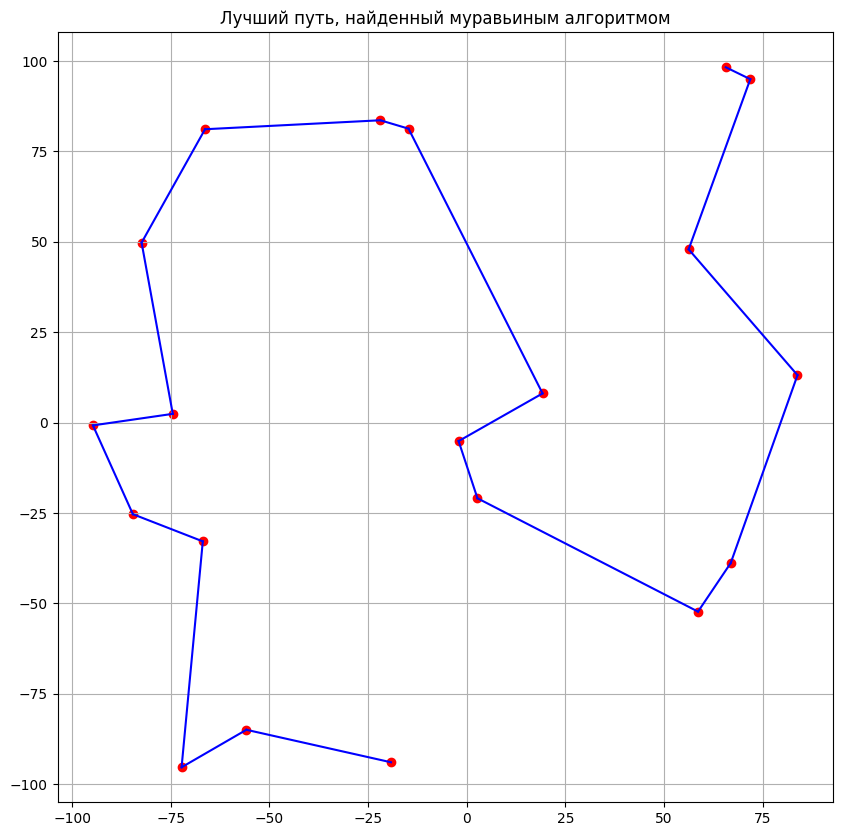

In [115]:
    ant = 15
    iter = 200
    alpha = 1.0
    beta = 4.0
    rho = 0.5
    n = 20
    coord = generate_coordinates(n)
    best_path, best_length, coords = ants_algorithm(ant, iter, alpha, beta, rho, n, coord)
    plot_results(coords, best_path)

In [116]:
print('Длина лучшего пути:', best_length)
print('Лучший путь:', best_path)

Длина лучшего пути: 679.2346960991019
Лучший путь: [13, 16, 15, 12, 8, 9, 2, 4, 10, 7, 0, 14, 5, 19, 1, 18, 6, 11, 3, 17]
